# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [127]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import date
from scipy.stats import linregress
from scipy import stats



# Import API key
from api_keys import weather_api_key


# Defininig Farenheit as units used in this project
units = "Imperial"


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [128]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

base_url= "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}"
#query_url

print(len(cities))
cities

623


['rio gallegos',
 'punta arenas',
 'rikitea',
 'coquimbo',
 'hermanus',
 'umzimvubu',
 'ushuaia',
 'barentsburg',
 'te anau',
 'los llanos de aridane',
 'luanda',
 'avarua',
 'brejo da madre de deus',
 'klaksvik',
 'severo-kurilsk',
 'kapaa',
 'alofi',
 'atuona',
 'mar del plata',
 'peterhead',
 'lata',
 'kavieng',
 'waitati',
 'honningsvag',
 'ribeira grande',
 'lima',
 'coihueco',
 'qaanaaq',
 'calbuco',
 'sao jose da coroa grande',
 'kemijarvi',
 'basco',
 'linguere',
 'alice springs',
 'hasaki',
 'cape town',
 'kodiak',
 'lagoa',
 'taolanaro',
 'kahului',
 'nicoya',
 'upernavik',
 'thompson',
 'mataura',
 'grindavik',
 'ahuimanu',
 'guerrero negro',
 'east london',
 'port alfred',
 'isangel',
 'belushya guba',
 'yomitan',
 'hollins',
 'nikolskoye',
 'yellowknife',
 'bengkulu',
 'mrakovo',
 'vikulovo',
 'umred',
 'busselton',
 'tocantinopolis',
 'cairns',
 'hilo',
 'butaritari',
 'poltavka',
 'puerto madryn',
 'umtata',
 'saint anthony',
 'sao joao da barra',
 'atambua',
 'tuatapere

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [129]:
city_name_data = []
lat_list = []
lng_list = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []



print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    try:
        response = requests.get(f"{query_url}&q={city}").json()
        city_name_data.append(response["name"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        city_print=(response["name"])
        print(f"Processing Record | {city_print}")
    except:
        print("No results, skipping.....")
    continue
    
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")



Beginning Data Retrieval
-----------------------------
Processing Record | Río Gallegos
Processing Record | Punta Arenas
Processing Record | Rikitea
Processing Record | Coquimbo
Processing Record | Hermanus
No results, skipping.....
Processing Record | Ushuaia
No results, skipping.....
Processing Record | Te Anau
Processing Record | Los Llanos de Aridane
Processing Record | Luanda
Processing Record | Avarua
Processing Record | Brejo da Madre de Deus
Processing Record | Klaksvík
Processing Record | Severo-Kuril'sk
Processing Record | Kapaa
Processing Record | Alofi
Processing Record | Atuona
Processing Record | Mar del Plata
Processing Record | Peterhead
Processing Record | Lata
Processing Record | Kavieng
Processing Record | Waitati
Processing Record | Honningsvåg
Processing Record | Ribeira Grande
Processing Record | Lima
Processing Record | Coihueco
Processing Record | Qaanaaq
Processing Record | Calbuco
Processing Record | São José da Coroa Grande
Processing Record | Kemijärvi
Proce

Processing Record | Mana
Processing Record | Ous
Processing Record | Derzhavīnsk
Processing Record | São Gabriel da Cachoeira
No results, skipping.....
Processing Record | Bethel
Processing Record | Talaya
No results, skipping.....
Processing Record | Tuban
Processing Record | Saint-Pierre
Processing Record | Port Elizabeth
Processing Record | Muros
Processing Record | Comodoro Rivadavia
Processing Record | Forsytheganj
Processing Record | Tebingtinggi
Processing Record | Leh
Processing Record | Esso
Processing Record | Sept-Îles
Processing Record | Marabu
Processing Record | Charters Towers
No results, skipping.....
Processing Record | Champerico
Processing Record | Hobyo
No results, skipping.....
Processing Record | Rodrigues Alves
Processing Record | Dolinsk
Processing Record | Drumnadrochit
Processing Record | Kuching
Processing Record | Auki
Processing Record | Porto Walter
Processing Record | Ilulissat
Processing Record | Sinnamary
Processing Record | Pozoblanco
Processing Record

Processing Record | Santa Isabel Rio Negro
Processing Record | Hong Kong
Processing Record | Waddān
Processing Record | Laas
Processing Record | Merritt Island
Processing Record | Yatou
Processing Record | Christchurch
Processing Record | Soria
Processing Record | Tilichiki
Processing Record | Khlung
Processing Record | Lagunas
Processing Record | Weston
Processing Record | Pontes e Lacerda
Processing Record | Muisne
Processing Record | Mouila
No results, skipping.....
No results, skipping.....
Processing Record | New Plymouth
Processing Record | Pecos
Processing Record | Polovinnoye
Processing Record | Lavrentiya
Processing Record | Talcahuano
Processing Record | Gamba
Processing Record | Srednekolymsk
Processing Record | Aksu
Processing Record | Belyy Yar
Processing Record | Tiarei
Processing Record | Huarmey
Processing Record | Whitehorse
Processing Record | Raudeberg
Processing Record | Byron Bay
Processing Record | Carquefou
Processing Record | Páez
No results, skipping.....
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [130]:
# weatherdata_df = pd.DataFrame({"City":city_name_data, 
#                                "Lat": lat_list,
#                                "Lng": lng_list,
#                                "Max Temp": max_temp,
#                                "Humidity": humidity,
#                                "Cloudiness":cloudiness,
#                                "Wind Speed": wind_speed,
#                                "Country": country,
#                                "Date":date})
# weatherdata_df


weather_dictionary_list = ({"City":city_name_data, 
                               "Lat": lat_list,
                               "Lng": lng_list,
                               "Max Temp": max_temp,
                               "Humidity": humidity,
                               "Cloudiness":cloudiness,
                               "Wind Speed": wind_speed,
                               "Country": country,
                               "Date":date})

weather_life_df = pd.DataFrame(weather_dictionary_list)


weather_life_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Río Gallegos,-51.62,-69.22,17.60,92,6,3.36,AR,1595294892
1,Punta Arenas,-53.15,-70.92,30.20,92,2,5.82,CL,1595294687
2,Rikitea,-23.12,-134.97,68.02,65,79,15.70,PF,1595294893
3,Coquimbo,-29.95,-71.34,53.60,87,90,1.48,CL,1595294893
4,Hermanus,-34.42,19.23,59.00,54,4,1.99,ZA,1595294893
...,...,...,...,...,...,...,...,...,...
568,Kachug,53.96,105.88,61.07,51,82,2.51,RU,1595294955
569,Goderich,43.75,-81.72,73.00,81,34,9.42,CA,1595294955
570,Hoi An,15.88,108.33,87.80,70,20,4.70,VN,1595294955
571,At-Bashi,41.17,75.81,55.44,62,8,1.79,KG,1595294955


In [131]:
# Exporting the dataframe above to CSV, located in the output_data directory

weather_life_df.to_csv(output_data_file)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [80]:
#  Get the indices of cities that have humidity over 100%.


over_100_humidity = weather_life_df.loc[weather_life_df["Humidity"]>99]
over_100_humidity.reset_index(inplace=True)
over_100_humidity

# ----------------------------------------


# weather_life_df.drop(weather_life_df['Humidity']>100)

# weather_life_df.filter


# cleaned_weather_life_df= weather_life_df.loc[(weather_life_df['Humidity'] > 100)]


# weather_life_df.filter(weather_life_df['Humidity']>50)

# weather_life_df

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,30,Port Elizabeth,-33.92,25.57,55.40,100,75,2.24,ZA,1595287815
1,53,Benalla,-36.55,145.98,50.00,100,90,2.73,AU,1595287616
2,97,Mar del Plata,-38.00,-57.56,50.00,100,90,23.04,AR,1595287716
3,104,Clyde River,70.47,-68.59,42.80,100,90,12.75,CA,1595287794
4,120,Talnakh,69.49,88.40,50.00,100,90,8.95,RU,1595287907
5,128,Hefei,31.86,117.28,75.20,100,100,6.71,CN,1595287908
6,216,Río Gallegos,-51.62,-69.22,19.40,100,1,3.36,AR,1595287917
7,269,Joensuu,62.60,29.76,59.00,100,100,1.12,FI,1595287923
8,271,Havøysund,71.00,24.66,51.80,100,75,1.12,NO,1595287923
9,311,Homagama,6.84,80.00,73.40,100,20,4.70,LK,1595287927


In [79]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".




In [ ]:
# Extract relevant fields from the data frame




# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

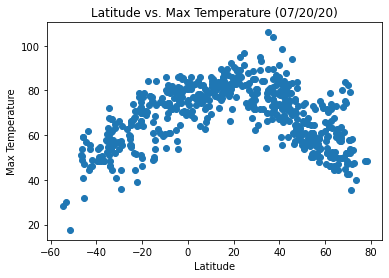

In [140]:
plt.scatter(weather_life_df['Lat'],weather_life_df['Max Temp'])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude vs. Max Temperature (07/20/20)")


plt.show()

## Latitude vs. Humidity Plot

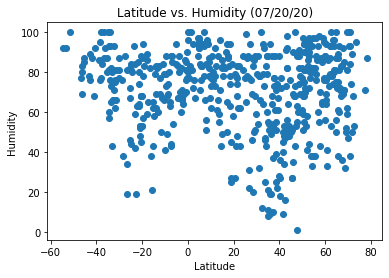

In [56]:
plt.scatter(weather_life_df['Lat'],weather_life_df['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity (07/20/20)")


plt.show()

## Latitude vs. Cloudiness Plot

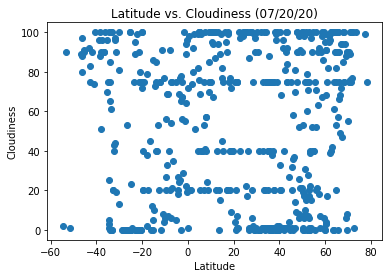

In [57]:
plt.scatter(weather_life_df['Lat'],weather_life_df['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness (07/20/20)")

plt.show()

## Latitude vs. Wind Speed Plot

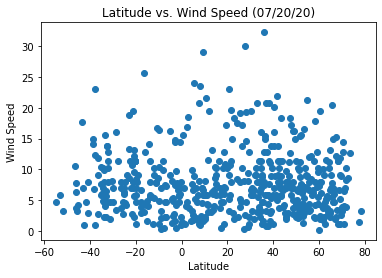

In [58]:
plt.scatter(weather_life_df['Lat'],weather_life_df['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed (07/20/20)")


plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots



In [116]:
# Create Northern and Southern Hemisphere DataFrames

nothern_hemis = weather_life_df.loc[weather_life_df["Lat"]>0]
nothern_hemis.reset_index(inplace=True)

southern_hemis = weather_life_df.loc[weather_life_df["Lat"]<0]
southern_hemis.reset_index(inplace=True)


# Latitudes
lat_graph_northern = nothern_hemis['Lat']
lat_graph_southern = southern_hemis['Lat']



# Max Temps
max_temp_graph_northern = nothern_hemis['Max Temp']
max_temp_graph_southern = southern_hemis['Max Temp']

mt_slope, mt_int, mt_r, mt_p, mt_std_err = stats.linregress(
    lat_graph_northern,max_temp_graph_northern)




# Humidities
hum_graph_northern = nothern_hemis['Humidity']
hum_graph_southern = southern_hemis['Humidity']


# Cloudiness
cloud_graph_northern = nothern_hemis['Cloudiness']
cloud_graph_southern = southern_hemis['Cloudiness']


# Wind Speeds
wind_speed_northern = nothern_hemis['Wind Speed']
wind_speed_southern = southern_hemis['Wind Speed']






####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

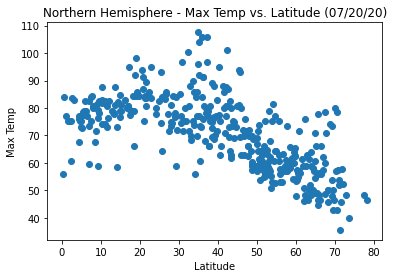

In [121]:
plt.scatter(lat_graph_northern,max_temp_graph_northern)

line_eq = "y = " + str(round(mt_slope,2)) + "x + " + str(round(mt_int,2))
plt.plot(lat_graph_northern,max_temp_graph_northern,"--")
regress_values = x_values * slope + intercept


plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude (07/20/20)")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

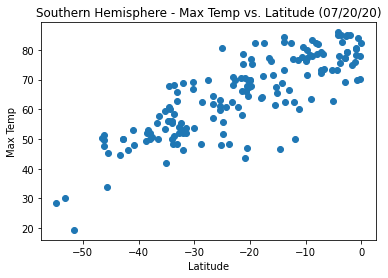

In [96]:
plt.scatter(lat_graph_southern,max_temp_graph_southern)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Max Temp vs. Latitude (07/20/20)")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

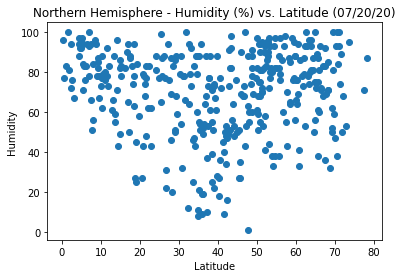

In [94]:
plt.scatter(lat_graph_northern,hum_graph_northern)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude (07/20/20)")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

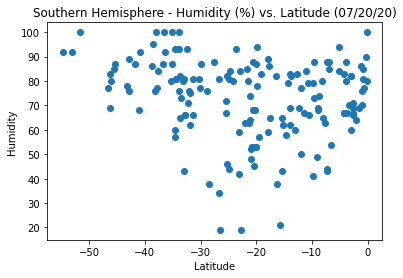

In [98]:
plt.scatter(lat_graph_southern,hum_graph_southern)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude (07/20/20)")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

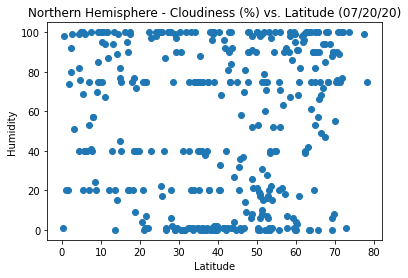

In [104]:
plt.scatter(lat_graph_northern,cloud_graph_northern)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude (07/20/20)")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

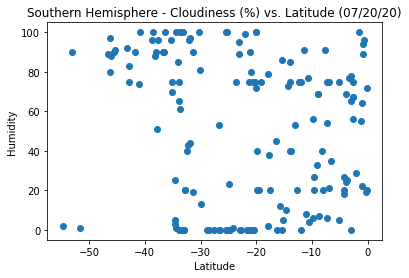

In [106]:
plt.scatter(lat_graph_southern,cloud_graph_southern)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude (07/20/20)")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

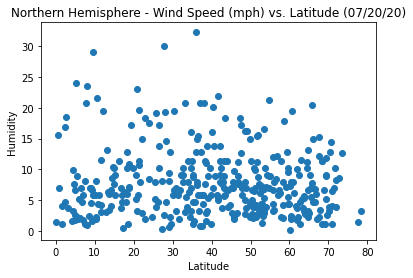

In [109]:
plt.scatter(lat_graph_northern,wind_speed_northern)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude (07/20/20)")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

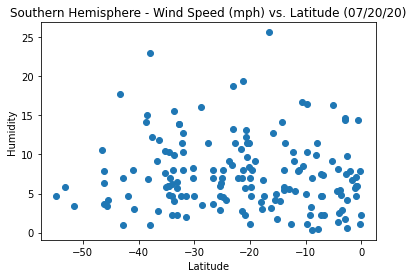

In [110]:
plt.scatter(lat_graph_southern,wind_speed_southern)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude (07/20/20)")

plt.show()